In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Import data

In [4]:
eating = pd.read_csv('eating.csv')
date = eating.pop('date')
df_eating = pd.DataFrame({})
df_eating['date'] = date
df_eating['Quantity (oz.)'] = eating.fillna(0).transpose().cumsum().tail(1).transpose()['qty.9']

In [5]:
rx = pd.read_csv('rx.csv')

## Merge data

In [6]:
df_all = df_eating.merge(rx, left_on=['date'], right_on=['date'])
day_number = np.arange(len(df_all))
df_all['day since vet visit'] = day_number
#df_all.columns
#df_all['Quantity (oz.)'].tail(20)

## Plot eating data -- All

After Suvi's visit with the vet in May, she was **actively fed** by placing a food bowl in front of her on regular occasions, through the day.  This active feeding continued until the 21st of June 2021 when it was determined that Suvi had regained her regular mass of ~11.4 pounds.  After this active feeding regiment, I ensured that Suvi had food in her bowl but she approached it **naturally** when she was hungry, rather than me actively placing the bowl in front of her.

The data plotted in the following cells is the cumulative data of both "active" and "natural" feeding.

For about ~50 days, Suvi received oral dosing of Prednisolone (0.75 ml) every day.  After that, for about 1-week, she received this dosage every second day.  After this 1-week alternate day dosing, she has been receiving 0.75 ml Prednisolone once every 3 days.

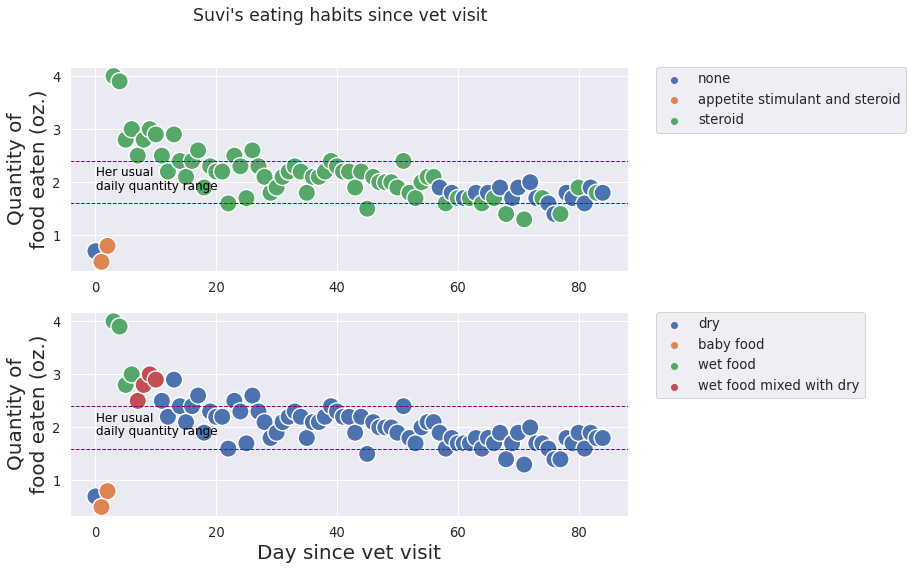

In [43]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Suvi\'s eating habits since vet visit')
sns.scatterplot(ax = axes[0], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', s=300)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[0].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[0].text(0.1, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[0].set_xlabel(' ', fontsize=20)
axes[0].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
#axes[0].legend(loc='lower right')
sns.scatterplot(ax = axes[1], data=df_all, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food',
               s=300)
#plt.legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[1].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[1].text(0.1, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[1].set_xlabel('Day since vet visit', fontsize=20)
axes[1].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
fig.set_size_inches(10, 8.27)

plt.savefig('./suvi_all.png')

### Describe combinations of different medication regimen and food type -- all data

count    75.000000
mean      1.957333
std       0.350356
min       0.700000
25%       1.700000
50%       1.900000
75%       2.200000
max       2.900000
Name: Quantity (oz.), dtype: float64

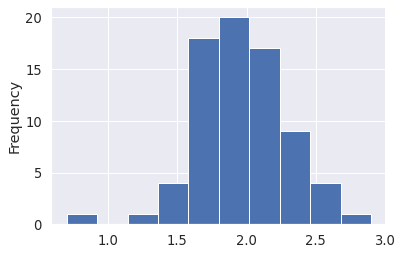

In [8]:
df_all[((df_all['rx'] == 'none') | (df_all['rx'] == 'steroid')) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'none') | (df_all['rx'] == 'steroid')) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

count    18.000000
mean      1.705556
std       0.287938
min       0.700000
25%       1.700000
50%       1.800000
75%       1.875000
max       2.000000
Name: Quantity (oz.), dtype: float64

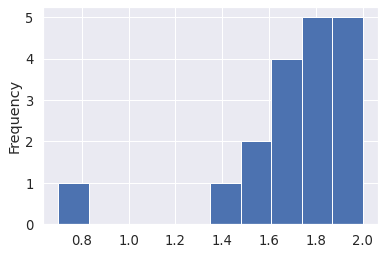

In [9]:
df_all[((df_all['rx'] == 'none') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'none') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

count    57.000000
mean      2.036842
std       0.332002
min       1.300000
25%       1.800000
50%       2.100000
75%       2.200000
max       2.900000
Name: Quantity (oz.), dtype: float64

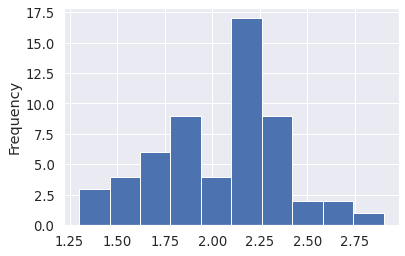

In [10]:
df_all[((df_all['rx'] == 'steroid') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].plot.hist()
df_all[((df_all['rx'] == 'steroid') ) & (df_all['type of food'] == 'dry')]['Quantity (oz.)'].describe()

In [14]:
df_all.columns


Index(['date', 'Quantity (oz.)', 'type of food', 'rx', 'day since vet visit'], dtype='object')

### Describe eating habits after 21st June 2021

Until 21st of June, Suvi was actively fed by placing a food bowl in front of her on a regular basis, throughout the day.  After the 21st of June, active feeding was stopped.  This led to Suvi regaining her usual habits of approaching her food bowl when she was hungry. 

In the cells that follow, *6/21/2021* is a threshold date, after which, her eating habits are natural.

In [22]:
threshold = df_all[df_all['date'] == '6/21/2021']['day since vet visit']
df_unassisted = df_all[df_all['day since vet visit'] >= 35]

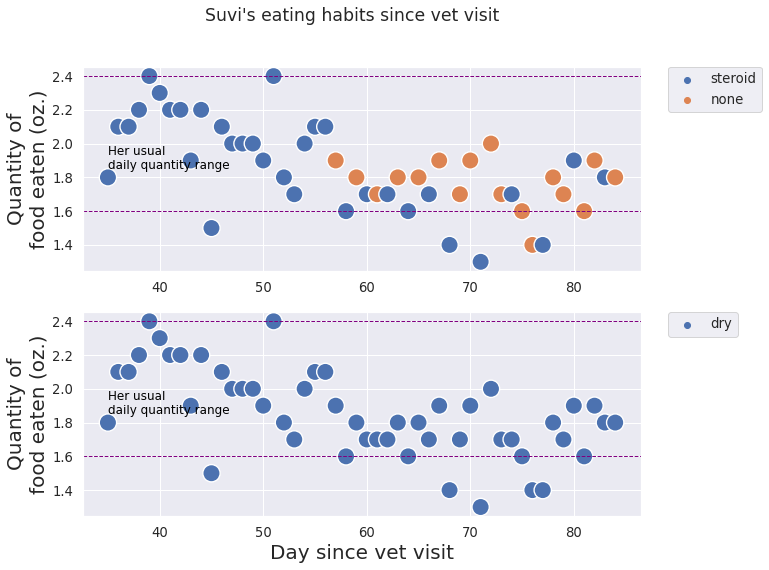

In [41]:
sns.set(font_scale = 1.2)
fig, axes = plt.subplots(2,1, sharey=True)
fig.suptitle('Suvi\'s eating habits since vet visit')
sns.scatterplot(ax = axes[0], data=df_unassisted, y="Quantity (oz.)", x="day since vet visit", hue = 'rx', s=300)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[0].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[0].text(35, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[0].set_xlabel(' ', fontsize=20)
axes[0].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
#axes[0].legend(loc='lower right')
sns.scatterplot(ax = axes[1], data=df_unassisted, y="Quantity (oz.)", x="day since vet visit", hue = 'type of food',
               s=300)
#plt.legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].axhline(1.6, color='purple', linewidth = 1, linestyle='--')
axes[1].axhline(2.4, color='purple', linewidth = 1, linestyle='--')
axes[1].text(35, 1.85, "Her usual\ndaily quantity range", horizontalalignment='left', size='small', color='black')
axes[1].set_xlabel('Day since vet visit', fontsize=20)
axes[1].set_ylabel('Quantity of\nfood eaten (oz.)', fontsize=20)
fig.set_size_inches(10, 8.27)

plt.savefig('./suvi_unassisted.png')

### Describing Suvi's eating habits after 21st June 2021

count    50.00000
mean      1.85600
std       0.25727
min       1.30000
25%       1.70000
50%       1.80000
75%       2.00000
max       2.40000
Name: Quantity (oz.), dtype: float64


<AxesSubplot:ylabel='Frequency'>

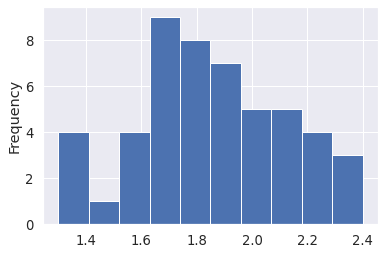

In [34]:
print(df_unassisted['Quantity (oz.)'].describe())
df_unassisted['Quantity (oz.)'].plot.hist()

count    17.000000
mean      1.764706
std       0.145521
min       1.400000
25%       1.700000
50%       1.800000
75%       1.900000
max       2.000000
Name: Quantity (oz.), dtype: float64


<AxesSubplot:ylabel='Frequency'>

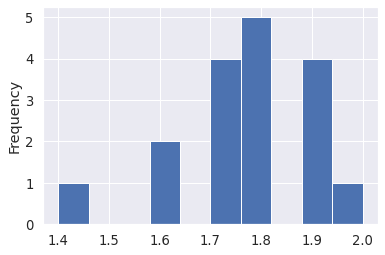

In [33]:
print(df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)'].describe())
df_unassisted[df_unassisted['rx'] == 'none']['Quantity (oz.)'].plot.hist()

count    33.000000
mean      1.903030
std       0.289919
min       1.300000
25%       1.700000
50%       1.900000
75%       2.100000
max       2.400000
Name: Quantity (oz.), dtype: float64


<AxesSubplot:ylabel='Frequency'>

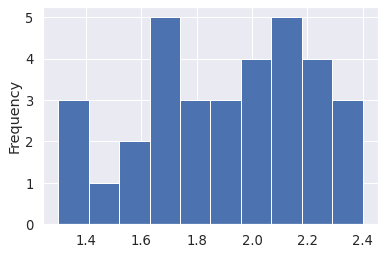

In [35]:
print(df_unassisted[df_unassisted['rx'] == 'steroid']['Quantity (oz.)'].describe())
df_unassisted[df_unassisted['rx'] == 'steroid']['Quantity (oz.)'].plot.hist()